In [1]:
#Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
#Importing the dataset
source = 'http://bit.ly/w-data'
df = pd.read_csv(source)


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

In [6]:
#Insights of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualization of the data set


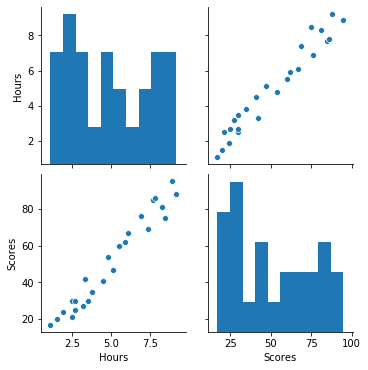

In [7]:
sns.pairplot(df)
plt.show()

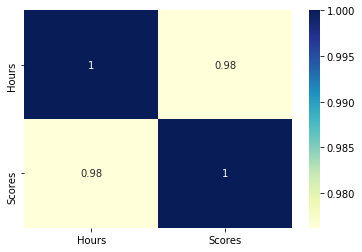

In [8]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Spliting the dataset 

In [9]:
X=df['Hours']
y=df['Scores']

In [10]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [11]:
X_train_lm.shape

(20,)

In [12]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [13]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(20, 1)
(20,)
(5, 1)
(5,)


# Applying Linear regression

In [14]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(lm.intercept_)
print(lm.coef_)

2.018160041434662
[9.91065648]


# Fitting the data 

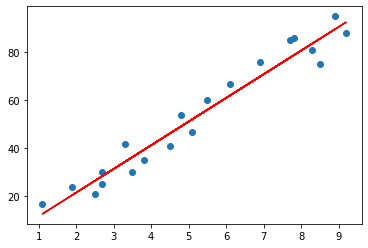

In [16]:
plt.scatter(X_train_lm, y_train_lm)
plt.plot(X_train_lm, 1.8709 + 9.854197*X_train_lm, 'r')
plt.show()

In [17]:
print(X_test_lm) # Testing data - In Hours
y_pred = lm.predict(X_test_lm) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test_lm, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# Predicting the value 9.25

In [19]:
# You can also test with your own data
# hours = 9.25
hours = [9.25]
# hours = hours.reshape(-1, 1)
own_pred = lm.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


Cheking various parameters

In [20]:
from sklearn import metrics  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_lm, y_pred)) 
print('r2_score Error:',r2_score(y_test_lm, y_pred))
print('Mean Squared Error: ',mean_squared_error(y_test_lm, y_pred))

Mean Absolute Error: 4.183859899002982
r2_score Error: 0.9454906892105354
Mean Squared Error:  21.598769307217456


In [25]:
from sklearn.linear_model import Lasso
modellasso = Lasso()
modellasso.fit(X_train_lm, y_train_lm)
print('Test scores')
print(model1.score(X_test_lm, y_test_lm))
print('\nTrain scores')
print(modellasso.score(X_train_lm, y_train_lm))

Test scores
0.9482597940686199

Train scores
0.951297282107653


In [26]:
hours = [9.25]

my_pred = modellasso.predict([hours])

In [27]:
print('Hours : 9.25')
print('Predicted Score:',my_pred[0])

Hours : 9.25
Predicted Score: 93.04269713841771


Comparing the different value

In [28]:


print('Linear Regression')
print('Test score: ',lm.score(X_test_lm, y_test_lm))
print('Predicted score for 9.25 hours:{} '.format(own_pred[0]))
print('\n------------------------\n')
print('Lasso')
print('Test score: ',modellasso.score(X_test_lm, y_test_lm))
print('Predicted score for 9.25 hours: ',my_pred[0])



Linear Regression
Test score:  0.9454906892105354
Predicted score for 9.25 hours:93.69173248737539 

------------------------

Lasso
Test score:  0.9482597940686199
Predicted score for 9.25 hours:  93.04269713841771
